# Apply and Visualize UMAP

**Gregory Way, 2019**

We are interested in visualizing the relationship among samples according to several variables.
These variables include `batch`, `dosage`, and `cell line`.

In [1]:
import os
import numpy as np
import pandas as pd
import umap

import plotnine as gg

from pycytominer import feature_select
from pycytominer.cyto_utils import infer_cp_features

In [2]:
%matplotlib inline

In [3]:
np.random.seed(123)

In [4]:
def process_umap(data_df):    
    # Prepare UMAP input by removing metadata columns
    metadata_cols = infer_cp_features(data_df, metadata=True)

    metadata_df = data_df.loc[:, metadata_cols]
    umap_data_df = data_df.drop(metadata_cols, axis="columns")
    
    # Apply UMAP
    reducer = umap.UMAP(random_state=123)
    embedding = reducer.fit_transform(umap_data_df)
    
    # Setup plotting logic
    embedding_df = pd.DataFrame(embedding, columns=['x', 'y'])
    embedding_df = embedding_df.merge(metadata_df, left_index=True, right_index=True)
    
    return embedding_df

## For Combined Batches of Four WT + Resistant Clones

In [5]:
# Load and process data
file = os.path.join("data", "merged", "combined_four_clone_dataset.csv")
data_df = pd.read_csv(file)

embedding_df = process_umap(data_df)
embedding_df.head()

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/umap/umap_.py:328: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../../../../../miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/umap/umap_.py", line 446:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/numba/object_mode_passes.py:178: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../../../../../../miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/umap/umap_.py", line 329:
@numba.jit()
def fuzzy_simplicial_s

,x,y,Metadata_Plate,Metadata_Well,Metadata_batch,Metadata_clone_number,Metadata_plate_ID,Metadata_plate_filename,Metadata_plate_map_name,Metadata_treatment,Metadata_clone_type
0,1.860604,-0.028995,217760,B02,2019_11_20_Batch6,BZ017,217760,20191120-20191115-HiDensity,217760,DMSO,resistant
1,1.616327,0.161014,217760,B03,2019_11_20_Batch6,WT002,217760,20191120-20191115-HiDensity,217760,DMSO,wildtype
2,0.934790,0.404577,217760,B04,2019_11_20_Batch6,WT008,217760,20191120-20191115-HiDensity,217760,DMSO,wildtype
3,2.098442,-2.672985,217760,B05,2019_11_20_Batch6,WT009,217760,20191120-20191115-HiDensity,217760,DMSO,wildtype
4,0.535473,-0.512729,217760,B06,2019_11_20_Batch6,BZ018,217760,20191120-20191115-HiDensity,217760,DMSO,resistant


## Visualize a Series of UMAP Representations

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 4 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/four_clone_umap_resistant_type.png
  warn('Filename: {}'.format(filename))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 4 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/four_clone_umap_resistant_type.pdf
  warn('Filename: {}'.format(filename))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 4 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechani

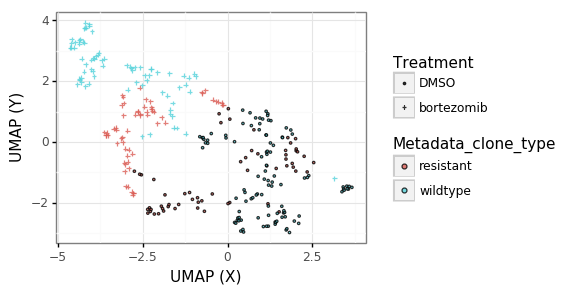

<ggplot: (-9223372036547405687)>

In [6]:
umap_resistant_type_gg = (
    gg.ggplot(embedding_df, gg.aes(x="x", y="y"))
    + gg.geom_point(
        gg.aes(fill="Metadata_clone_type", shape="Metadata_treatment"),
        color='black', alpha=0.8)
    + gg.theme_bw()
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
    + gg.scale_shape_manual(name="Treatment", values=[".", "+"])
)

file = os.path.join("figures", "umap", "four_clone_umap_resistant_type")
for extension in ['.png', '.pdf', '.svg']:
    umap_resistant_type_gg.save(filename='{}{}'.format(file, extension), height=3, width=4, dpi=400)

umap_resistant_type_gg

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 4 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/four_clone_umap_batch.png
  warn('Filename: {}'.format(filename))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 4 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/four_clone_umap_batch.pdf
  warn('Filename: {}'.format(filename))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 4 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/

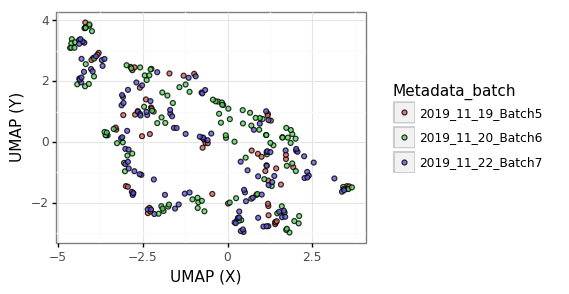

<ggplot: (310667633)>

In [7]:
umap_batch_gg = (
    gg.ggplot(embedding_df, gg.aes(x="x", y="y"))
    + gg.geom_point(gg.aes(fill="Metadata_batch"), color='black', alpha=0.8)
    + gg.theme_bw()
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
)

file = os.path.join("figures", "umap", "four_clone_umap_batch")
for extension in ['.png', '.pdf', '.svg']:
    umap_batch_gg.save(filename='{}{}'.format(file, extension), height=3, width=4, dpi=400)

umap_batch_gg

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 4 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/four_clone_umap_plate_facet.png
  warn('Filename: {}'.format(filename))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 4 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/four_clone_umap_plate_facet.pdf
  warn('Filename: {}'.format(filename))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 4 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/li

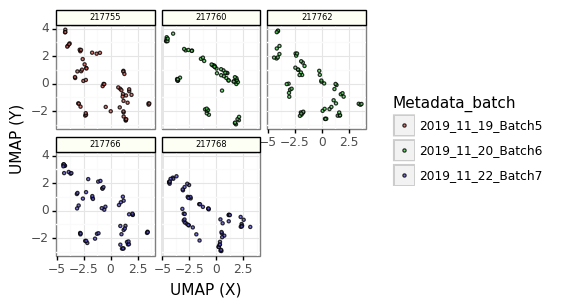

<ggplot: (307603064)>

In [8]:
umap_batch_facet_gg = (
    gg.ggplot(embedding_df, gg.aes(x="x", y="y"))
    + gg.geom_point(gg.aes(fill="Metadata_batch"), color='black', alpha=0.8, size=0.8)
    + gg.theme_bw()
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
    + gg.facet_wrap("~Metadata_plate_ID")
    + gg.theme(
        strip_text=gg.element_text(size=6, color="black"),
        strip_background=gg.element_rect(colour="black", fill="#fdfff4"),
    )
)
    
file = os.path.join("figures", "umap", "four_clone_umap_plate_facet")
for extension in ['.png', '.pdf', '.svg']:
    umap_batch_facet_gg.save(filename='{}{}'.format(file, extension), height=3, width=4, dpi=400)

umap_batch_facet_gg

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 4 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/four_clone_umap_facet_clone_sample.png
  warn('Filename: {}'.format(filename))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 4 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/four_clone_umap_facet_clone_sample.pdf
  warn('Filename: {}'.format(filename))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 4 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance

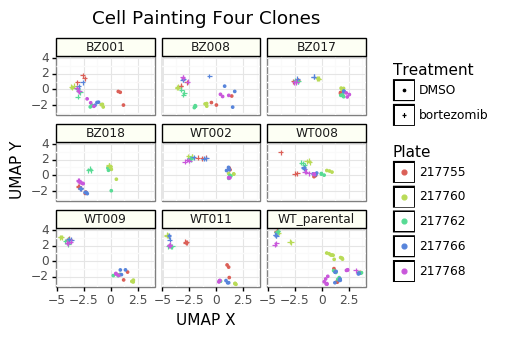

<ggplot: (-9223372036547459142)>

In [9]:
# Visualize UMAP results
clone_facet_gg = (
    gg.ggplot(embedding_df,
              gg.aes('x', 'y', color='factor(Metadata_Plate)', shape="Metadata_treatment"))
    + gg.geom_point()
    + gg.theme_bw()
    + gg.xlab("UMAP X")
    + gg.ylab("UMAP Y")
    + gg.scale_shape_manual(name="Treatment", values=[".", "+"])
    + gg.scale_color_discrete(name="Plate")
    + gg.facet_wrap("~Metadata_clone_number")
    + gg.ggtitle("Cell Painting Four Clones")
    + gg.theme(
        legend_key=gg.element_rect(color="black", fill = "white"),
        strip_background=gg.element_rect(colour="black", fill="#fdfff4")
    )
)
    
file = os.path.join("figures", "umap", "four_clone_umap_facet_clone_sample")
for extension in ['.png', '.pdf', '.svg']:
    clone_facet_gg.save(filename='{}{}'.format(file, extension), height=3, width=4, dpi=400)

clone_facet_gg

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 4 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/four_clone_umap_clone_sample.png
  warn('Filename: {}'.format(filename))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 4 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/four_clone_umap_clone_sample.pdf
  warn('Filename: {}'.format(filename))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 4 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/

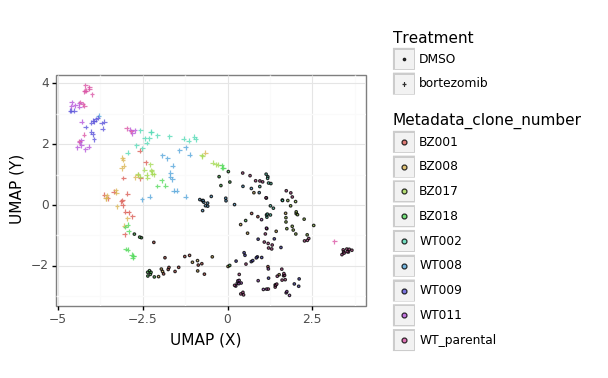

<ggplot: (315155113)>

In [10]:
umap_well_embedding_gg = (
    gg.ggplot(embedding_df, gg.aes(x="x", y="y"))
    + gg.geom_point(
        gg.aes(fill="Metadata_clone_number", shape="Metadata_treatment"),
        color='black', alpha=0.8
    )
    + gg.theme_bw()
    + gg.scale_shape_manual(name="Treatment", values=[".", "+"])
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
)

file = os.path.join("figures", "umap", "four_clone_umap_clone_sample")
for extension in ['.png', '.pdf', '.svg']:
    umap_well_embedding_gg.save(filename='{}{}'.format(file, extension), height=3, width=4, dpi=400)

umap_well_embedding_gg

## For Clone A and E Data

In [11]:
# Load and process data
file = os.path.join("data", "merged", "combined_cloneAcloneE_dataset.csv")
cloneAE_data_df = pd.read_csv(file)

embedding_df = process_umap(cloneAE_data_df)
embedding_df.head()

,x,y,Metadata_CellLine,Metadata_Dosage,Metadata_Plate,Metadata_Well,Metadata_batch,Metadata_plate_map_name,Metadata_clone_type
0,2.279357,2.406323,WT,0.0,207106_exposure320,B02,2019_03_20_Batch2,PlateMap_207106_exposure320,wildtype
1,2.443825,2.783246,WT,0.0,207106_exposure320,B03,2019_03_20_Batch2,PlateMap_207106_exposure320,wildtype
2,2.157378,2.537693,WT,0.0,207106_exposure320,B04,2019_03_20_Batch2,PlateMap_207106_exposure320,wildtype
3,4.903467,4.945716,CloneA,0.0,207106_exposure320,B05,2019_03_20_Batch2,PlateMap_207106_exposure320,resistant
4,4.724929,4.835830,CloneA,0.0,207106_exposure320,B06,2019_03_20_Batch2,PlateMap_207106_exposure320,resistant


/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 4 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/cloneAE_umap.png
  warn('Filename: {}'.format(filename))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 4 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/cloneAE_umap.pdf
  warn('Filename: {}'.format(filename))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 4 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plot

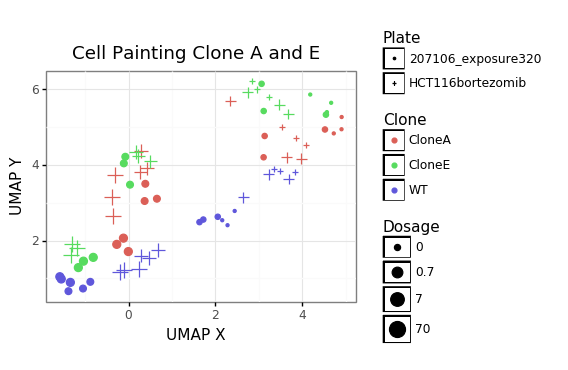

<ggplot: (-9223372036547326292)>

In [12]:
# Visualize UMAP results
clone_ae_umap_gg = (
    gg.ggplot(embedding_df,
              gg.aes('x', 'y',
                     shape="Metadata_Plate", 
                     size='factor(Metadata_Dosage)',
                     color="Metadata_CellLine"))
    + gg.geom_point()
    + gg.theme_bw()
    + gg.scale_shape_manual(name="Plate", values=[".", "+"])
    + gg.scale_color_discrete(name="Clone")
    + gg.scale_size_discrete(name="Dosage")
    + gg.xlab("UMAP X")
    + gg.ylab("UMAP Y")
    + gg.ggtitle("Cell Painting Clone A and E")
    + gg.theme(
        legend_key=gg.element_rect(color="black", fill = "white"),
        strip_background=gg.element_rect(colour="black", fill="#fdfff4")
    )
)

file = os.path.join("figures", "umap", "cloneAE_umap")
for extension in ['.png', '.pdf', '.svg']:
    clone_ae_umap_gg.save(filename='{}{}'.format(file, extension), height=3, width=4, dpi=400)

clone_ae_umap_gg

## Merged Data

In [13]:
drop_cols = ["Metadata_plate_ID", "Metadata_plate_filename"]

data_recode_df = (
    data_df
    .drop(drop_cols, axis="columns")
    .rename(
        {
            "Metadata_clone_number": "Metadata_CellLine"
        }, axis="columns"
    )
    .assign(Metadata_Dosage=0.7)
    .assign(Metadata_Dataset="FourClone")
)

cloneAE_data_recode_df = (
    cloneAE_data_df.assign(Metadata_treatment="bortezomib")
    .assign(Metadata_Dataset="CloneAE")
)

cloneAE_data_recode_df.loc[cloneAE_data_recode_df.Metadata_Dosage == 0, "Metadata_treatment"] = "DMSO"

In [14]:
combined_df = pd.concat([data_recode_df, cloneAE_data_recode_df], sort=True).reset_index(drop=True)
combined_df = feature_select(combined_df, operation="drop_na_columns")

print(combined_df.shape)
combined_df.head()

(372, 130)


,Cells_AreaShape_Compactness,Cells_AreaShape_Zernike_0_0,Cells_AreaShape_Zernike_1_1,Cells_AreaShape_Zernike_2_0,Cells_AreaShape_Zernike_2_2,Cells_AreaShape_Zernike_3_1,Cells_AreaShape_Zernike_3_3,Cells_AreaShape_Zernike_4_2,Cells_AreaShape_Zernike_4_4,Cells_AreaShape_Zernike_5_1,...,Nuclei_RadialDistribution_RadialCV_AGP_2of4,Nuclei_RadialDistribution_RadialCV_DNA_1of4,Nuclei_RadialDistribution_RadialCV_DNA_2of4,Nuclei_RadialDistribution_RadialCV_ER_1of4,Nuclei_RadialDistribution_RadialCV_ER_2of4,Nuclei_RadialDistribution_RadialCV_Mito_1of4,Nuclei_RadialDistribution_RadialCV_Mito_2of4,Nuclei_Texture_Correlation_AGP_20_00,Nuclei_Texture_Correlation_DNA_10_02,Nuclei_Texture_Correlation_RNA_10_01
0,0.189274,0.109365,-0.811836,-0.466001,0.300846,-0.254086,0.404354,0.543607,-0.256574,0.265439,...,-0.411439,-1.197580,-1.399548,0.253595,0.426549,-1.287468,-1.355719,0.498751,0.513148,0.666170
1,-0.222248,0.367615,-0.054924,0.076488,0.369648,-0.243910,-0.020086,0.240903,-0.391431,-0.557976,...,-1.011310,-1.299634,-1.486909,-0.252963,-0.854310,-0.650813,-1.688788,0.349735,1.281194,-0.471892
2,-1.257285,1.343296,1.599078,-0.391985,0.122107,-1.260834,1.145458,-1.340928,0.461150,0.728835,...,-1.404775,-1.232926,-1.029580,-1.219007,-0.889640,-1.358425,-1.173443,0.156124,0.110486,-0.156254
3,-1.611328,0.151133,2.079090,1.314216,-1.916614,-0.004357,0.079067,-0.472197,-2.204009,1.885843,...,-0.196245,-1.306784,-1.451951,0.480220,0.261291,-0.421427,-0.571662,0.067349,2.192065,1.251972
4,0.790436,-0.058394,0.081060,-1.531684,1.237598,0.536189,0.996043,0.492447,0.232684,-0.475201,...,0.150347,-1.248662,-0.903875,-0.976532,-0.202870,-0.106807,0.374607,0.504743,-0.405788,0.677186


In [15]:
embedding_df = process_umap(combined_df)
embedding_df.head()

,x,y,Metadata_CellLine,Metadata_Dataset,Metadata_Dosage,Metadata_Plate,Metadata_Well,Metadata_batch,Metadata_clone_type,Metadata_plate_map_name,Metadata_treatment
0,1.152873,0.354317,BZ017,FourClone,0.7,217760,B02,2019_11_20_Batch6,resistant,217760,DMSO
1,1.069625,0.634401,WT002,FourClone,0.7,217760,B03,2019_11_20_Batch6,wildtype,217760,DMSO
2,0.274375,0.767746,WT008,FourClone,0.7,217760,B04,2019_11_20_Batch6,wildtype,217760,DMSO
3,2.477739,-1.032615,WT009,FourClone,0.7,217760,B05,2019_11_20_Batch6,wildtype,217760,DMSO
4,0.680879,0.252080,BZ018,FourClone,0.7,217760,B06,2019_11_20_Batch6,resistant,217760,DMSO


/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 4 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/clone_compare_batch_effect.png
  warn('Filename: {}'.format(filename))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 4 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/clone_compare_batch_effect.pdf
  warn('Filename: {}'.format(filename))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 4 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/

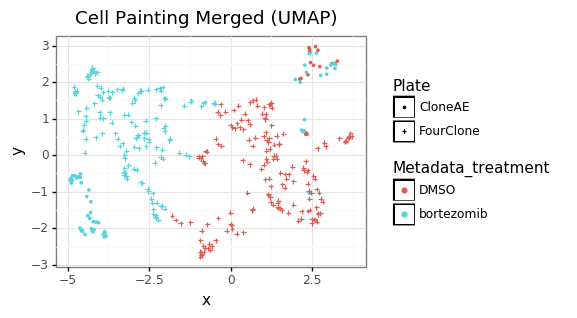

<ggplot: (-9223372036558501134)>

In [16]:
# Visualize UMAP results
merged_umap_gg = (
    gg.ggplot(
        embedding_df,
        gg.aes(
            'x', 'y',
            color="Metadata_treatment",
            shape='Metadata_Dataset'
        )
    )
    + gg.geom_point()
    + gg.theme_bw()
    + gg.xlab("x")
    + gg.ylab("y")
    + gg.scale_shape_manual(name="Plate", values=[".", "+"])
    + gg.ggtitle("Cell Painting Merged (UMAP)")
    + gg.theme(legend_key=gg.element_rect(color="black", fill = "white"))
)

file = os.path.join("figures", "umap", "clone_compare_batch_effect")
for extension in ['.png', '.pdf', '.svg']:
    merged_umap_gg.save(filename='{}{}'.format(file, extension), height=3, width=4, dpi=400)

merged_umap_gg